In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [3]:
path = '/kaggle/input/aptospreprocessed/preprocess/'

In [4]:
train_names = []
train_labels = []

# for i in os.listdir(os.path.join('/kaggle/input/idrid-dataset-cropped', 'dataset')):
for i in range(5):
    train_class = os.listdir(os.path.join('/kaggle/input/aptospreprocessed/preprocess', str(i)))
    for j in train_class:
        img = os.path.join(str(i), j)
        train_names.append(img)
        if str(i) in ['2', '3', '4']:
            train_labels.append('1')
        else:
            train_labels.append(str(i))
print('Number of train images : {} ({})\n'.format(len(train_names), len(train_labels)))

Number of train images : 3662 (3662)



<AxesSubplot:ylabel='count'>

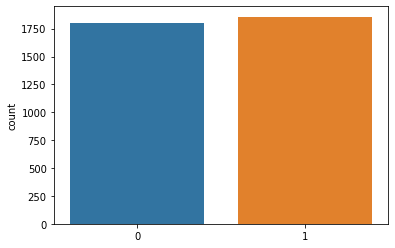

In [5]:
sns.countplot(x=train_labels)

In [ ]:
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
# for i in os.listdir(os.path.join('/kaggle/input/idrid','train-crop-classwise')):
# for i in os.listdir(os.path.join('/kaggle/input/aptosdatasetcropped', 'dataset-aptos')):
    # get the list of images in a given class
    # try:
    #    train_class = os.listdir(os.path.join('/kaggle/input/aptosdatasetcropped/dataset-aptos', i))
    # except NotADirectoryError:
    #    pass
  # plot 5 images per class

train_class = ['0', '1', '2', '3', '4']
for j in range(5):
    take_img = '/kaggle/input/aptosdatasetcropped/dataset-aptos/' + train_class[j] + '/'
    
    arr = os.listdir(take_img)[:5]
    # print(arr)
    for i in range(len(arr)):
    # for name in arr:
        name = arr[i]
        img = PIL.Image.open(take_img + name)
        axs[count][i].title.set_text(j)
        axs[count][i].imshow(img)
    count += 1
"""   
for j in range(5):
    take_img = '/kaggle/input/aptosdatasetcropped/dataset-aptos'
    img = os.path.join('/kaggle/input/aptosdatasetcropped/dataset-aptos', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
count += 1
"""
fig.tight_layout()

In [6]:
retina_df = pd.DataFrame({'Image': train_names, 'Labels': train_labels})
retina_df = shuffle(retina_df)
retina_df.head()

,Image,Labels
1089,0/d6df4fe492ec.jpeg,0
94,0/1ec95179cdfe.jpeg,0
146,0/976082127e2a.jpeg,0
400,0/c06024f05a16.jpeg,0
1483,0/691eeb59b4cb.jpeg,0


In [7]:
train, test = train_test_split(retina_df, test_size = 0.2)
train.head()

,Image,Labels
3533,4/61e301bd3c25.jpeg,1
25,0/342edf9b889d.jpeg,0
2121,1/ca1036496659.jpeg,1
918,0/bb2f89488ecd.jpeg,0
2260,2/47b756014447.jpeg,1


In [28]:
one = retina_df['Labels'].value_counts()
one

1    1857
0    1805
Name: Labels, dtype: int64

In [8]:
test.head()

,Image,Labels
280,0/3599029efeb3.jpeg,0
276,0/4a1afe4044f4.jpeg,0
2459,2/39923b29988a.jpeg,1
308,0/afc345cc9145.jpeg,0
202,0/d5c63a8d9e94.jpeg,0


In [9]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        validation_split = 0.15)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    # directory='/kaggle/input/drdiffclasscrop/train-crop-classwise/',
    directory=path,
    x_col="Image",
    y_col="Labels",
    target_size=(512, 512),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    # directory='/kaggle/input/drdiffclasscrop/train-crop-classwise/',
    directory=path,
    x_col="Image",
    y_col="Labels",
    target_size=(512, 512),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    # directory='/kaggle/input/drdiffclasscrop/train-crop-classwise/',
    directory=path,
    x_col="Image",
    y_col="Labels",
    target_size=(512, 512),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)


Found 2490 validated image filenames belonging to 2 classes.
Found 439 validated image filenames belonging to 2 classes.
Found 733 validated image filenames belonging to 2 classes.


In [11]:
def res_block(X, filter, stage):

    # Convolutional block
    X_copy = X
    f1, f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

    # Short Path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X


In [12]:
input_shape = (512,512,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
# X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)
X = Dense(2, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()


Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [14]:
checkpointer = ModelCheckpoint(filepath="/kaggle/working/preprocess-binary-aptos-resnet-5-100-weights.hdf5", verbose=1, save_best_only=True)

In [16]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 100, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer])

Epoch 1/100
77/77 [==============================] - 40s 518ms/step - loss: 0.0088 - accuracy: 0.9959 - val_loss: 0.1985 - val_accuracy: 0.9615

Epoch 00001: val_loss did not improve from 0.13747
Epoch 2/100
77/77 [==============================] - 40s 519ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.2235 - val_accuracy: 0.9615

Epoch 00002: val_loss did not improve from 0.13747
Epoch 3/100
77/77 [==============================] - 40s 522ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.3098 - val_accuracy: 0.9567

Epoch 00003: val_loss did not improve from 0.13747
Epoch 4/100
77/77 [==============================] - 40s 512ms/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 1.9361 - val_accuracy: 0.7308

Epoch 00004: val_loss did not improve from 0.13747
Epoch 5/100
77/77 [==============================] - 40s 519ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.2996 - val_accuracy: 0.9471

Epoch 00005: val_loss did not improve from 0.13747
Epoch 6/100
77/77 [=

In [17]:
model.save('/kaggle/working/preprocess-binary-aptos-resnet-5-100-save-weights-2.hdf5')

In [18]:
model.load_weights('/kaggle/working/preprocess-binary-aptos-resnet-5-100-weights.hdf5')

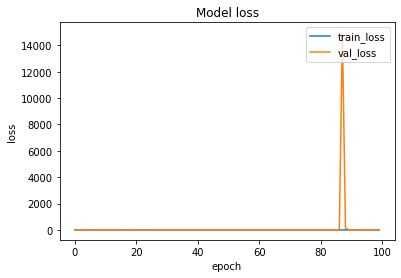

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [20]:
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 14s 632ms/step - loss: 0.0829 - accuracy: 0.9787
Accuracy Test : 0.9786931872367859


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from PIL import Image

prediction = []
original = []
# image = []
count = 0

for item in range(len(test)):
# for item in test[]:
    img = PIL.Image.open(path + test['Image'].tolist()[item])
    # img = PIL.Image.open(path + test)
    img = np.asarray(img, dtype=np.float32)
    img = img / 255
    img = img.reshape(-1, 512, 512, 3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(str(predict))
    # prediction.append(predict)
    original.append(test['Labels'].tolist()[item])

In [22]:
print(original[:5])
print(prediction[:5])

['0', '0', '1', '0', '0']
['0', '0', '1', '0', '0']


In [23]:
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.9768076398362893


In [24]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       354
           1       0.98      0.97      0.98       379

    accuracy                           0.98       733
   macro avg       0.98      0.98      0.98       733
weighted avg       0.98      0.98      0.98       733



In [29]:
test_path = '../input/test-dataset/test-dataset-idrid-eye/'

In [31]:
test_org = []
test_pred = []

for i in range(2):
    test_imgs = os.listdir(test_path + str(i))
    
    for test in test_imgs:
        test = Image.open(test_path + str(i) + '/' + test)
        test = np.asarray(test, dtype='float32')
        test = test / 255
        test = test.reshape(-1, 512, 512, 3)
        predict = model.predict(test)
        predict = np.argmax(predict)
        test_pred.append(str(predict))
        test_org.append(str(i))

In [39]:
test_score = accuracy_score(test_org, test_pred)
print("Test Accuracy : {}".format(test_score))

Test Accuracy : 0.7098214285714286


In [41]:
print(classification_report(np.asarray(test_org), np.asarray(test_pred)))

              precision    recall  f1-score   support

           0       0.98      0.47      0.63       120
           1       0.62      0.99      0.76       104

    accuracy                           0.71       224
   macro avg       0.80      0.73      0.70       224
weighted avg       0.81      0.71      0.69       224



<a href="./preprocess-binary-aptos-resnet-5-100-weights.hdf5"> Download File </a>